In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv(r'C:\Users\HP\Documents\Data Analysis\Portfolio Projects\Machine learning\Decision tree\Credit scoring model\Credit Score_train.csv')

In [71]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
94,30,Male,117500,Master's Degree,Married,2,Owned,High
95,35,Female,90000,Doctorate,Married,1,Owned,High
96,40,Male,142500,High School Diploma,Single,0,Owned,High
97,45,Female,115000,Bachelor's Degree,Married,3,Owned,High


In [68]:
df.describe()

,Age,Income,Number of Children,adj_income
count,99.000000,99.000000,99.000000,99.000000
mean,38.363636,84545.454545,0.666667,11.257254
std,8.503846,33653.705478,0.914732,0.439341
min,25.000000,25000.000000,0.000000,10.126631
25%,31.000000,58750.000000,0.000000,10.980820
50%,38.000000,85000.000000,0.000000,11.350407
75%,45.500000,107500.000000,1.000000,11.584976
max,53.000000,162500.000000,3.000000,11.998433


In [42]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [43]:
pd.crosstab(df['Education'], df['Credit Score'], margins=True)

# We can say that as the education level increases so does the credit score of the applicant

Credit Score,Average,High,Low,All
Education,,,,
Associate's Degree,9,3,3,15
Bachelor's Degree,8,17,0,25
Doctorate,0,18,0,18
High School Diploma,3,10,6,19
Master's Degree,0,22,0,22
All,20,70,9,99


In [44]:
pd.crosstab(df['Marital Status'], df['Credit Score'], margins=True)

# Married people have high chance of getting credit

Credit Score,Average,High,Low,All
Marital Status,,,,
Married,0,53,0,53
Single,20,17,9,46
All,20,70,9,99


In [45]:
pd.crosstab(df['Home Ownership'], df['Credit Score'], margins=True)

# People with their own homes have high credit score

Credit Score,Average,High,Low,All
Home Ownership,,,,
Owned,0,69,0,69
Rented,20,1,9,30
All,20,70,9,99


In [46]:
import matplotlib.pyplot as plt 

<Axes: >

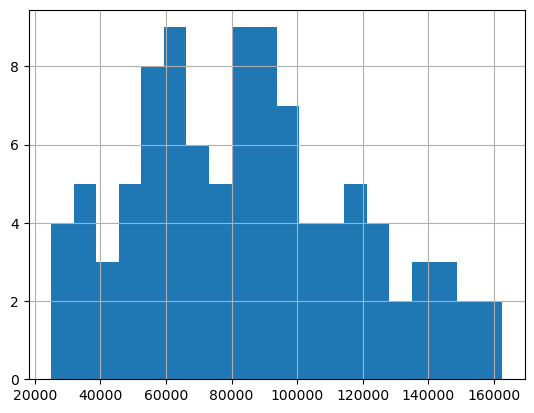

In [47]:
df['Income'].hist(bins = 20)

# income distribution is normal

In [49]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,adj_income
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High,10.819778
1,30,Male,100000,Master's Degree,Married,2,Owned,High,11.512925
2,35,Female,75000,Doctorate,Married,1,Owned,High,11.225243
3,40,Male,125000,High School Diploma,Single,0,Owned,High,11.736069
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High,11.512925
...,...,...,...,...,...,...,...,...,...
94,30,Male,117500,Master's Degree,Married,2,Owned,High,11.674194
95,35,Female,90000,Doctorate,Married,1,Owned,High,11.407565
96,40,Male,142500,High School Diploma,Single,0,Owned,High,11.867097
97,45,Female,115000,Bachelor's Degree,Married,3,Owned,High,11.652687


In [50]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score', 'adj_income'],
      dtype='object')

In [51]:
selecte_x = ['Gender','Income', 'Education', 'Marital Status', 'Home Ownership']
x = df[selecte_x]
y = df['Credit Score']

In [52]:
le_gender = LabelEncoder()
le_education = LabelEncoder()
le_ms = LabelEncoder()
le_ho = LabelEncoder()

In [53]:
x['gender_n'] = le_gender.fit_transform(x['Gender'])
x['education_n'] = le_education.fit_transform(x['Education'])
x['ms_n'] = le_ms.fit_transform(x['Marital Status'])
x['ho_n'] = le_ho.fit_transform(x['Home Ownership'])

In [54]:
x_updated = x.drop(['Gender', 'Education', 'Marital Status', 'Home Ownership'], axis = 1)

In [55]:
x_test, x_train, y_test, y_train = train_test_split(x_updated, y, test_size=0.2, random_state = 45)

In [56]:
x_test

,Income,gender_n,education_n,ms_n,ho_n
45,90000,0,2,0,0
9,105000,1,2,1,0
20,65000,0,1,0,0
18,30000,0,0,1,1
73,37500,0,3,1,1
...,...,...,...,...,...
61,60000,0,1,1,1
32,130000,1,3,1,0
3,125000,1,3,1,0
30,105000,1,4,0,0


In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [61]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
model.score(x_test, y_test)

0.7848101265822784

In [67]:
model.predict(x_test)

array(['High', 'High', 'High', 'High', 'High', 'Average', 'Average',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'Average', 'High', 'High',
       'Average', 'High', 'High', 'High', 'High', 'Average', 'High',
       'High', 'High', 'Average', 'High', 'High', 'High', 'High',
       'Average', 'High', 'High', 'High', 'Average', 'High', 'High',
       'Average', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'Average', 'High', 'High', 'High', 'High',
       'High', 'High', 'High'], dtype=object)